# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Linearity-of-x-vs-y" data-toc-modified-id="Linearity-of-x-vs-y-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Linearity of x vs y</a></div><div class="lev2 toc-item"><a href="#Harvey-Collier-multiplier-test-for-linearity" data-toc-modified-id="Harvey-Collier-multiplier-test-for-linearity-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Harvey-Collier multiplier test for linearity</a></div><div class="lev1 toc-item"><a href="#No-Outliers-and-No-High-Leverage-Points" data-toc-modified-id="No-Outliers-and-No-High-Leverage-Points-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>No Outliers and No High-Leverage Points</a></div><div class="lev1 toc-item"><a href="#Mean-of-Residuals" data-toc-modified-id="Mean-of-Residuals-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Mean of Residuals</a></div><div class="lev1 toc-item"><a href="#Equal-variances-of-Error-Terms-(Homoscedasticity-)" data-toc-modified-id="Equal-variances-of-Error-Terms-(Homoscedasticity-)-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Equal variances of Error Terms (Homoscedasticity )</a></div><div class="lev2 toc-item"><a href="#Goldfeld–Quandt-Test" data-toc-modified-id="Goldfeld–Quandt-Test-41"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Goldfeld–Quandt Test</a></div><div class="lev2 toc-item"><a href="#Breusch–Pagan-Test" data-toc-modified-id="Breusch–Pagan-Test-42"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Breusch–Pagan Test</a></div><div class="lev2 toc-item"><a href="#White-Test" data-toc-modified-id="White-Test-43"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>White Test</a></div><div class="lev2 toc-item"><a href="#Bartlett-Test" data-toc-modified-id="Bartlett-Test-44"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Bartlett Test</a></div><div class="lev2 toc-item"><a href="#Levene-Test" data-toc-modified-id="Levene-Test-45"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Levene Test</a></div><div class="lev1 toc-item"><a href="#Check-for-Normality-of-error-terms/residuals" data-toc-modified-id="Check-for-Normality-of-error-terms/residuals-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Check for Normality of error terms/residuals</a></div><div class="lev1 toc-item"><a href="#No-autocorrelation-of-residuals" data-toc-modified-id="No-autocorrelation-of-residuals-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>No autocorrelation of residuals</a></div><div class="lev1 toc-item"><a href="#No-perfect-multicollinearity" data-toc-modified-id="No-perfect-multicollinearity-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>No perfect multicollinearity</a></div>

https://www.kaggle.com/shrutimechlearn/step-by-step-assumptions-linear-regression

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [10, 8]
plt.style.use('fivethirtyeight')
%matplotlib inline

In [2]:
infile = "data_1_1.csv"
df = pd.read_csv(infile,nrows=None,skiprows=None,sep=',')
print(df.shape)
df.head(2).append(df.tail(2))

(100, 2)


,x,y
0,-2.344913,-0.553881
1,-1.278761,-2.904648
98,3.108702,-4.989791
99,1.049333,4.007686


# Linearity of x vs y

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


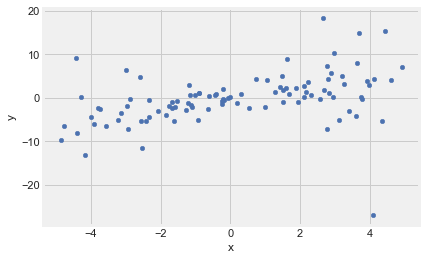

In [3]:
df.plot.scatter(x='x',y='y')

In [4]:
# the data forms cone like shape in +-x directions from zero

In [5]:
# it does not look linear 

In [6]:
x = df['x'].values.reshape(-1,1)
y = df['y'].values.reshape(-1,1)
x.shape

(100, 1)

In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(x)

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 0,test_size=0.25)

In [9]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(X,y)
y_pred = regr.predict(X)

In [10]:
print("R squared: {}".format(r2_score(y_true=y,y_pred=y_pred)))

R squared: 0.16398631228084282


In [11]:
# Using sm
import statsmodels.api as sm

In [12]:
x = sm.add_constant(x)
print(x.shape)
x[:5]

(100, 2)


array([[ 1.        , -2.34491337],
       [ 1.        , -1.278761  ],
       [ 1.        ,  0.72853363],
       [ 1.        ,  4.0820779 ],
       [ 1.        , -2.98318069]])

In [13]:
res = sm.OLS(y,x).fit()

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.164
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     19.22
Date:                Sun, 23 Jun 2019   Prob (F-statistic):           2.93e-05
Time:                        13:23:26   Log-Likelihood:                -308.57
No. Observations:                 100   AIC:                             621.1
Df Residuals:                      98   BIC:                             626.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2695      0.536     -0.503      0.616      -1.333       0.794
x1             0.8808      0.201      4.384      0.000       0.482       1.279
==============================================================================
Omnibus:                       51.887   Durbin-Watson:                   2.329
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              472.400
Skew:                          -1.324   Prob(JB):                    2.63e-103
Kurtosis:                      13.313   Cond. No.                         2.68
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
y_pred = res.predict()

In [15]:
resids = res.resid

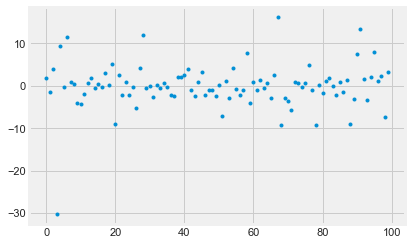

In [16]:
plt.plot(resids,'.')

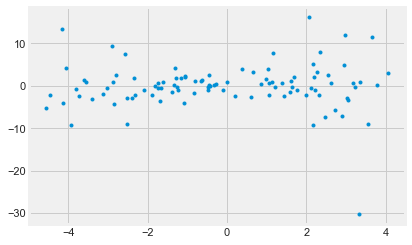

In [17]:
# check predict vs error
plt.plot(y_pred,resids,'.')

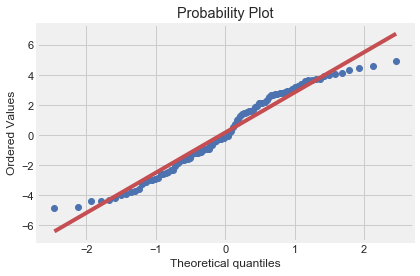

In [18]:
from scipy import stats

stats.probplot(x[:,1], dist="norm", plot=plt)
plt.show()

## Harvey-Collier multiplier test for linearity

In [19]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
from scipy import stats

In [20]:
name = ['t value', 'p value']
test = sms.linear_harvey_collier(res)
lzip(name, test)

[('t value', 0.8383355666410092), ('p value', 0.40392477295969664)]

# No Outliers and No High-Leverage Points

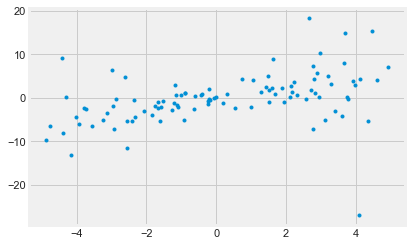

In [21]:
plt.plot(x[:,1],y,'.')

# Mean of Residuals

In [22]:
resids.mean()

-8.881784197001253e-17

# Equal variances of Error Terms (Homoscedasticity )
Homescedasticity means the errors exhibit constant variance. This is a key assumption of linear regression. Heteroscedasticity, on the other hand, is what happens when errors show some sort of growth. The tell tale sign you have heteroscedasticity is a fan-like shape in your residual plot.



**From statsmodels 
http://www.statsmodels.org/stable/diagnostic.html

In many cases of statistical analysis, we are not sure whether our statistical model is correctly specified. For example when using ols, then linearity and homoscedasticity are assumed, some test statistics additionally assume that the errors are normally distributed or that we have a large sample. Since our results depend on these statistical assumptions, the results are only correct of our assumptions hold (at least approximately).

One solution to the problem of uncertainty about the correct specification is to use robust methods, for example robust regression or robust covariance (sandwich) estimators. The second approach is to test whether our sample is consistent with these assumptions.

The following briefly summarizes specification and diagnostics tests for linear regression.

**Heteroscedasticity Tests**   
For these test the null hypothesis is that all observations have the same error variance, i.e. errors are homoscedastic. The tests differ in which kind of heteroscedasticity is considered as alternative hypothesis. They also vary in the power of the test for different types of heteroscedasticity.

- [het_breuschpagan](http://www.statsmodels.org/stable/generated/statsmodels.stats.diagnostic.het_breuschpagan.html#statsmodels.stats.diagnostic.het_breuschpagan)
  Lagrange Multiplier Heteroscedasticity Test by Breusch-Pagan
- [het_white](http://www.statsmodels.org/stable/generated/statsmodels.stats.diagnostic.het_white.html#statsmodels.stats.diagnostic.het_white)
    Lagrange Multiplier Heteroscedasticity Test by White
- [het_goldfeldquandt](http://www.statsmodels.org/stable/generated/statsmodels.stats.diagnostic.het_goldfeldquandt.html#statsmodels.stats.diagnostic.het_goldfeldquandt)
    test whether variance is the same in 2 subsamples

Tests in regression
- Bartlett's test
- Levene's test
- Goldfeld–Quandt test
- Park test
- Glejser test
- Brown–Forsythe test
- Harrison–McCabe test
- Breusch–Pagan test
- White test
- Cook–Weisberg test

```
Using python:
statsmodels: Goldfeld–Quandt test, Breusch–Pagan test, White test
scipy.stats: Bartlett's test, Levene's test
```

Checking heteroscedasticity : Using Goldfeld Quandt we test for heteroscedasticity.  

Null Hypothesis: Error terms are homoscedastic  
Alternative Hypothesis: Error terms are heteroscedastic.

**Example** 
A classic example of heteroscedasticity is that of income versus expenditure on meals. As one's income increases, the variability of food consumption will increase. A poorer person will spend a rather constant amount by always eating inexpensive food; a wealthier person may occasionally buy inexpensive food and at other times eat expensive meals. Those with higher incomes display a greater variability of food consumption.


**Fixes**  
https://www.wikiwand.com/en/Heteroscedasticity  

There are four common corrections for heteroscedasticity. They are:

- View logarithmized data. Non-logarithmized series that are growing exponentially often appear to have increasing variability as the series rises over time. The variability in percentage terms may, however, be rather stable.
- Use a different specification for the model (different X variables, or perhaps non-linear transformations of the X variables).
- Apply a weighted least squares estimation method, in which OLS is applied to transformed or weighted values of X and Y. The weights vary over observations, usually depending on the changing error variances. In one variation the weights are directly related to the magnitude of the dependent variable, and this corresponds to least squares percentage regression.[17]
- Heteroscedasticity-consistent standard errors (HCSE), while still biased, improve upon OLS estimates.[5] HCSE is a consistent estimator of standard errors in regression models with heteroscedasticity. This method corrects for heteroscedasticity without altering the values of the coefficients. This method may be superior to regular OLS because if heteroscedasticity is present it corrects for it, however, if the data is homoscedastic, the standard errors are equivalent to conventional standard errors estimated by OLS. Several modifications of the White method of computing heteroscedasticity-consistent standard errors have been proposed as corrections with superior finite sample properties.
- Use MINQUE or even the customary estimators  
$$
s_{i}^{2}=\left(n_{i}-1\right)^{-1} \sum_{j}\left(y_{i j}-\overline{y}_{i}\right)^{2}
$$
(for  i = 1,2,...,k} independent samples with  j=1,2,...,n_i observations each),  whose efficiency losses are not substantial when the number of observations per sample is large ({ n_{i}>5}), especially for small number of independent samples.


If the P-value is less than (or equal to) alpha , then the null hypothesis is rejected in favor of the alternative hypothesis. And, if the P-value is greater than , then the null hypothesis is not rejected.

## Goldfeld–Quandt Test

In [40]:
name = ['F statistic', 'p-value']

test = sms.het_goldfeldquandt(resids, x)

outputs = lzip(name1, test)
print(outputs)

p_gold = outputs[1][1]
print('p-value = ', p_gold)

pd.DataFrame(outputs)

# we always want p-value < 0.05 to reject null hyp at 95% conf level
# if p-value is less than 0.05 null hypothesis that data has equal variance is
# violated and we have problem of heteroskedasticity.

[('Lagrange multiplier statistic', 0.7440349335668989), ('p-value', 0.8454386103076834), ('f-value', 'increasing')]
p-value =  0.8454386103076834


,0,1
0,Lagrange multiplier statistic,0.744035
1,p-value,0.845439
2,f-value,increasing


## Breusch–Pagan Test
Breusch-Pagan Lagrange Multiplier test for heteroscedasticity

The tests the hypothesis that the residual variance does not depend on the variables in x in the form

$$
sigma_i = sigma * f(alpha_0 + alpha z_i)
$$

Homoscedasticity implies that $alpha=0$

In [41]:
test = sms.het_breuschpagan(res.resid, res.model.exog) 

outputs = lzip(name, test)

p_pagan = outputs[1][1]
print('p-value = ', p_pagan)
outputs

p-value =  0.08172435758204045


[('F statistic', 3.030271158838982), ('p-value', 0.08172435758204045)]

## White Test
White’s Lagrange Multiplier Test for Heteroscedasticity

In [42]:
test = sms.het_white(res.resid, res.model.exog)
outputs = lzip(name, test)

p_white = outputs[1][1]
print('p-value = ', p_white)
outputs

p-value =  0.00989192340464606


[('F statistic', 9.232073345028969), ('p-value', 0.00989192340464606)]

## Bartlett Test
Perform Bartlett’s test for equal variances

Bartlett’s test tests the null hypothesis that all input samples are from populations with equal variances. For samples from significantly non-normal populations, Levene’s test `levene`_ is more robust.

In [48]:
outputs = stats.bartlett(x[:,1],resids)
p_bartlett = outputs.pvalue

print('p-value = ', p_bartlett)
print(outputs)

p-value =  4.70348160010305e-11
BartlettResult(statistic=43.29681641699685, pvalue=4.70348160010305e-11)


In [43]:
#stats.bartlett(x,resids) # use only x[:,1]  first column value

## Levene Test
The Levene test tests the null hypothesis that all input samples are from populations with equal variances. Levene’s test is an alternative to Bartlett’s test bartlett in the case where there are significant deviations from normality.

In [49]:
outputs = stats.levene(x[:,1],resids)
p_levene = outputs.pvalue

print('p-value = ', p_levene)
print(outputs)

p-value =  0.03635075814492131
LeveneResult(statistic=4.440694374282156, pvalue=0.03635075814492131)


In [50]:
# stats.levene(x,resids) # ValueError: setting an array element with a sequence.

In [58]:
p_values = pd.DataFrame({'Goldfeld–Quandt': [p_gold], 'Breusch–Pagan': [p_pagan],
                         'White': [p_white],
                         'Bartlett': [p_bartlett], 'Levene': [p_levene]}).T
p_values.columns = ['p_value']
p_values['alpha'] = 0.05
p_values['p_value_less_alpha'] = p_values['p_value'] < 0.05

p_values

,p_value,alpha,p_value_less_alpha
Goldfeld–Quandt,8.454386e-01,0.05,False
Breusch–Pagan,8.172436e-02,0.05,False
White,9.891923e-03,0.05,True
Bartlett,4.703482e-11,0.05,True
Levene,3.635076e-02,0.05,True


# Check for Normality of error terms/residuals

/Users/poudel/miniconda3/envs/dataSc/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


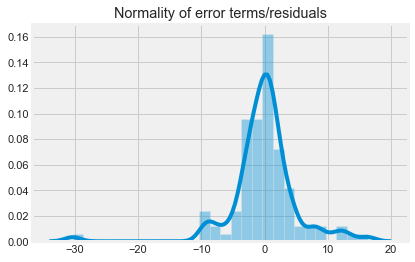

In [30]:
p = sns.distplot(resids,kde=True)
p = plt.title('Normality of error terms/residuals')

# No autocorrelation of residuals

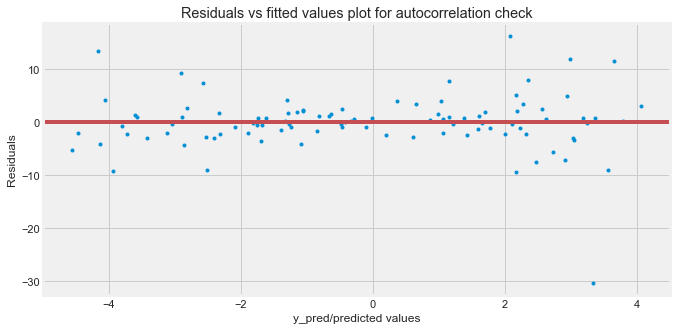

In [31]:
plt.figure(figsize=(10,5))
plt.plot(y_pred,resids,'.')
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')

plt.axhline(c='r')
p = plt.title('Residuals vs fitted values plot for autocorrelation check')

Checking for autocorrelation To ensure the absence of autocorrelation we use Ljungbox test.  
Null Hypothesis: Autocorrelation is absent.  
Alternative Hypothesis: Autocorrelation is present.  

In [32]:
from statsmodels.stats import diagnostic as diag
min(diag.acorr_ljungbox(resids , lags = 40)[1])

# Since p value is NOT more than 0.05 we  reject the null hypothesis that
# error terms are not autocorrelated. Bad.

0.01203580332825726

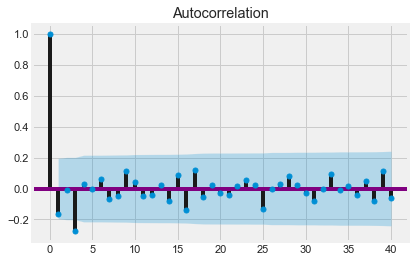

In [33]:
# autocorrelation
sm.graphics.tsa.plot_acf(resids, lags=40)
plt.show()

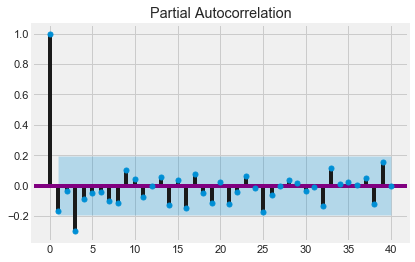

In [34]:
# partial autocorrelation
sm.graphics.tsa.plot_pacf(resids, lags=40)
plt.show()

# No perfect multicollinearity

In [35]:
# there is just one feature, no multi-collinearlity exists.